In [3]:
# jt -t monokai -f roboto -fs 12 -cellw 100%

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8, 8)
import seaborn as sns
import scipy
%matplotlib inline
# matplotlib.rcParams['axes.facecolor']='black'
# matplotlib.rcParams['axes.edgecolor']='white'
# matplotlib.rcParams['xtick.color']='white'
# matplotlib.rcParams['ytick.color']='white'
# matplotlib.rcParams['axes.prop_cycle']=matplotlib.cycler(color=["yellow", "#e94cdc", "0.7"])
# matplotlib.rcParams['axes.linewidth']=1.3
# matplotlib.rcParams['text.color']='yellow'

In [16]:
matplotlib.rcParams['figure.figsize'] = (8, 8)

### Задача 1.1

В задаче классификации с двумя классами $\mathbb{Y} \in \{ -1,1 \}$ выборка задана точками прямой $\mathbb{X} = \{-\frac{L}{2}, \dots , -\frac{3}{2}, -\frac{1}{2}, \frac{1}{2}, \frac{3}{2}, \dots, \frac{L}{2}   \}$. Для семейства алгоритмов классификации $a_{\theta}(x) = sign(x - \theta)$ с параметром $\theta \in \mathbb{R}$ построить матрицу ошибок и график зависиости $n(a_{\theta}, \mathbb{X})$ от $\theta$, если целевая зависимость имеет вид:

1) $y(x) = sign(x)$

2) $y(x) = sign(\sin(\pi x))$

3) $y(x) = \left \{ \begin{array}{rcl}
sign(x), |x| > M\\
sign(\sin(\pi x)), |x| \le M
\end{array} \right.$

Сколько различных векторов ошибок порождает данное семейство алгоритмов? Сколько из них допускают $m$ ошибков $m = 0, 1, \dots, L$ на генеральной совокупности?

In [17]:
L = 40
M = 10
x = np.array(list(-np.arange(1, L, 2)/2)[::-1] + list(np.arange(1, L, 2)/2))
y1 = np.sign(x)
y2 = np.sign(np.sin(x*np.pi))
y3 = np.array([np.sign(i) if np.abs(i) > M else np.sign(np.sin(i*np.pi)) for i in x])
a_theta = lambda theta: np.sign(x - theta)
n_a_theta = lambda a, y: np.sum(y != a)
theta = np.linspace(-L/2-1, L/2+1, 2000)
n_a_theta1 = np.array([n_a_theta(a=a_theta(i), y=y1) for i in theta])
n_a_theta2 = np.array([n_a_theta(a=a_theta(i), y=y2) for i in theta])
n_a_theta3 = np.array([n_a_theta(a=a_theta(i), y=y3) for i in theta])

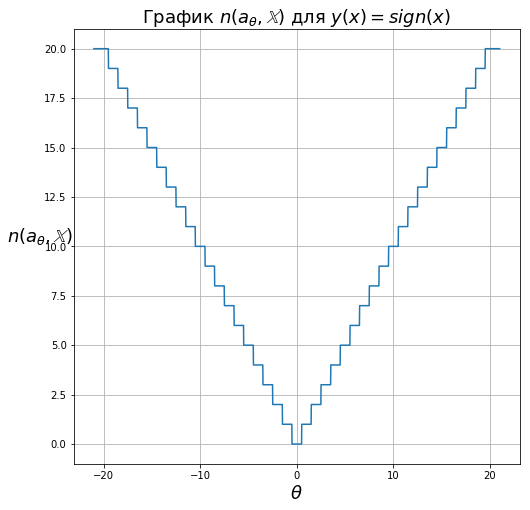

In [18]:
plt.plot(theta, n_a_theta1)
plt.xlabel(r'$\theta$', fontsize=18)#, color='yellow')
plt.ylabel(r'$n(a_{\theta}, \mathbb{X})$', fontsize=18, rotation=0)#, color='yellow')
plt.title(r'График $n(a_{\theta}, \mathbb{X})$ для $y(x) = sign(x)$', fontsize=18);
plt.grid();

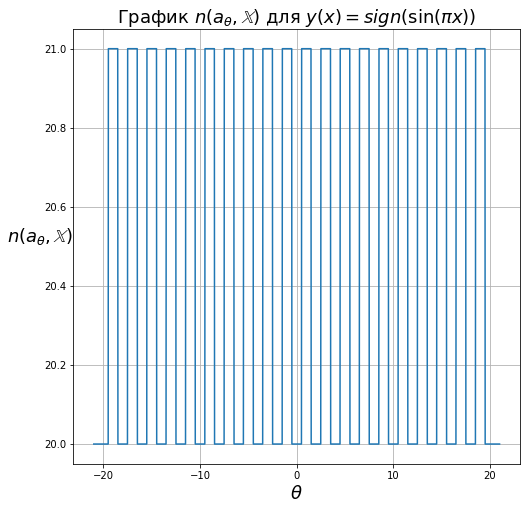

In [21]:
plt.plot(theta, n_a_theta2)
plt.xlabel(r'$\theta$', fontsize=18)#, color='yellow')
plt.ylabel(r'$n(a_{\theta}, \mathbb{X})$', fontsize=18, rotation=0)#, color='yellow')
plt.title(r'График $n(a_{\theta}, \mathbb{X})$ для $y(x) = sign(\sin(\pi x))$', fontsize=18);
plt.grid();

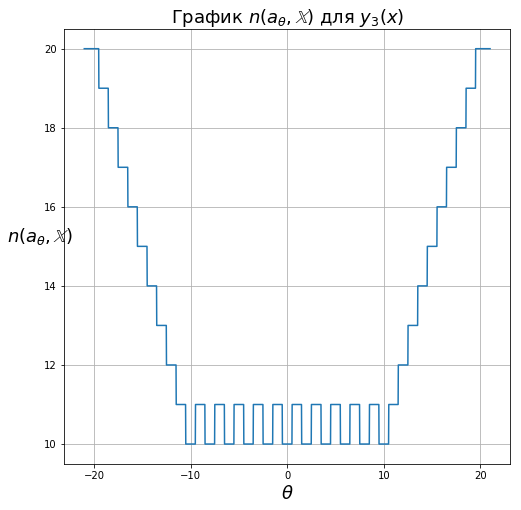

In [22]:
plt.plot(theta, n_a_theta3)
plt.xlabel(r'$\theta$', fontsize=18)#, color='yellow')
plt.ylabel(r'$n(a_{\theta}, \mathbb{X})$', fontsize=18, rotation=0)#, color='yellow')
plt.title(r'График $n(a_{\theta}, \mathbb{X})$ для $y_{3}(x)}$', fontsize=18);
plt.grid();